# Plateforme d'Acquisition et de Traitement Automatisé des Textes
### Carnet d'expérimentation
---

## Sujet : Comité de Suivi - Descripteurs Linguistiques

---

# Observations et environnement
---

## Environnement

In [1]:
_rs = 42

In [2]:
cd ../..

/Volumes/Geek/Work/Patat


In [3]:
import ast
import importlib
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
tqdm.pandas()

## Données

In [4]:
import patat.util.file

filename = 'data/prod/230517-OIDS-Label.pickle'

df_label = patat.util.file.pickle_load(filename)

In [5]:
labels = ['infox', 'entites_nommees', 'ouverture_esprit', 'faits', 'opinions',
       'propos_raportes', 'sources_citees', 'fausse_nouvelle', 'insinuations',
       'exageration', ]

In [6]:
df_label[labels].describe()

,infox,entites_nommees,ouverture_esprit,faits,opinions,propos_raportes,sources_citees,fausse_nouvelle,insinuations,exageration
count,900.000000,804.000000,803.000000,804.000000,804.000000,803.000000,803.000000,802.000000,802.000000,552.000000
mean,0.414444,0.618159,0.063512,0.717662,0.547264,0.244085,0.400996,0.152120,0.331671,0.317029
std,0.492900,0.486140,0.244033,0.450417,0.498071,0.429811,0.490406,0.359361,0.471107,0.465741
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Experience
---

## Calcul descripteurs pour les textes

### Part of Speech

In [10]:
import spacy
from spacy.language import Language

spacy.info()

{'spacy_version': '3.7.2',
 'location': '/opt/homebrew/Caskroom/miniforge/base/envs/pt310/lib/python3.10/site-packages/spacy',
 'platform': 'macOS-13.6-arm64-arm-64bit',
 'python_version': '3.10.11',
 'pipelines': {'fr_core_news_lg': '3.7.0'}}

In [13]:
nlp = spacy.load("fr_core_news_lg")

def get_spacy_doc(text):
    return nlp(text)

df_spacy = df_label[['infox','text']].copy()

In [14]:
df_spacy['spacy_doc'] = df_spacy['text'].progress_apply(get_spacy_doc)
df_spacy

  0%|          | 0/904 [00:00<?, ?it/s]

,infox,text,spacy_doc
0,0.0,L’Arabie saoudite organise des célébrations d'...,"(L’, Arabie, saoudite, organise, des, célébrat..."
1,1.0,Les réseaux sociaux coupés volontairement ? Qu...,"(Les, réseaux, sociaux, coupés, volontairement..."
2,1.0,Un rapport du Pentagone affirme que les extrat...,"(Un, rapport, du, Pentagone, affirme, que, les..."
3,1.0,Un sondage défavorable pour Emmanuel Macron su...,"(Un, sondage, défavorable, pour, Emmanuel, Mac..."
4,1.0,Le président ukrainien Zelensky se cache dans ...,"(Le, président, ukrainien, Zelensky, se, cache..."
...,...,...,...
901,1.0,Des victimes de test PCR témoignent\n De : ht...,"(Des, victimes, de, test, PCR, , témoignent, ..."
902,1.0,Résultats de l’audit en Arizona : 54 000 bulle...,"(Résultats, de, l’, audit, en, Arizona, :, 54,..."
903,0.0,Tempête Aurore : de puissantes rafales de vent...,"(Tempête, Aurore, :, de, puissantes, rafales, ..."
904,0.0,Euro 2021 : revivez la victoire des Belges sur...,"(Euro, 2021, :, revivez, la, victoire, des, Be..."


In [39]:
from collections import Counter
def get_linguistic_features(row):
    text = row['text']
    doc = row['spacy_doc']
    nb_token = len(doc)
    row['nb_token'] = nb_token
    row['nb_sent'] = len(row['text'].split('.'))
    row['nb_exclam'] = text.count('?')+text.count('!')+text.count('(')+text.count(')')
    token_pos = [token.pos_ for token in doc]
    pos_counter = Counter(token_pos)
    for pos in pos_counter:
        row[pos] = pos_counter[pos]    
    return row

In [40]:
df_features = df_spacy.progress_apply(get_linguistic_features, axis=1)
df_features = df_features.fillna(0)
df_features

  0%|          | 0/904 [00:00<?, ?it/s]

,ADJ,ADP,ADV,AUX,CCONJ,DET,INTJ,NOUN,NUM,PRON,...,SPACE,SYM,VERB,X,infox,nb_exclam,nb_sent,nb_token,spacy_doc,text
0,24.0,63,27.0,28.0,9.0,58.0,0.0,77,3.0,21.0,...,23,0.0,46,2.0,0.0,2,14,464,"(L’, Arabie, saoudite, organise, des, célébrat...",L’Arabie saoudite organise des célébrations d'...
1,46.0,114,27.0,30.0,15.0,78.0,0.0,144,15.0,20.0,...,26,0.0,54,8.0,1.0,9,26,695,"(Les, réseaux, sociaux, coupés, volontairement...",Les réseaux sociaux coupés volontairement ? Qu...
2,48.0,101,23.0,24.0,15.0,79.0,0.0,131,13.0,11.0,...,44,1.0,51,29.0,1.0,10,19,683,"(Un, rapport, du, Pentagone, affirme, que, les...",Un rapport du Pentagone affirme que les extrat...
3,11.0,40,17.0,19.0,2.0,38.0,0.0,62,12.0,22.0,...,18,1.0,37,1.0,1.0,14,16,382,"(Un, sondage, défavorable, pour, Emmanuel, Mac...",Un sondage défavorable pour Emmanuel Macron su...
4,19.0,57,13.0,24.0,6.0,56.0,0.0,68,7.0,30.0,...,13,0.0,37,0.0,1.0,2,18,415,"(Le, président, ukrainien, Zelensky, se, cache...",Le président ukrainien Zelensky se cache dans ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,49.0,150,47.0,60.0,22.0,137.0,0.0,241,22.0,66.0,...,109,0.0,134,20.0,1.0,15,50,1243,"(Des, victimes, de, test, PCR, , témoignent, ...",Des victimes de test PCR témoignent\n De : ht...
902,125.0,298,93.0,104.0,45.0,284.0,0.0,410,22.0,80.0,...,18,0.0,204,1.0,1.0,8,62,1968,"(Résultats, de, l’, audit, en, Arizona, :, 54,...",Résultats de l’audit en Arizona : 54 000 bulle...
903,9.0,45,6.0,25.0,0.0,38.0,0.0,67,12.0,5.0,...,5,0.0,26,0.0,0.0,0,15,281,"(Tempête, Aurore, :, de, puissantes, rafales, ...",Tempête Aurore : de puissantes rafales de vent...
904,7.0,25,2.0,5.0,2.0,21.0,0.0,40,6.0,0.0,...,4,0.0,11,0.0,0.0,4,7,159,"(Euro, 2021, :, revivez, la, victoire, des, Be...",Euro 2021 : revivez la victoire des Belges sur...


In [41]:
no_scale_columns = ['infox','nb_token', 'spacy_doc', 'text','nb_sent'] 
df_pos = df_features.drop(columns=['infox', 'spacy_doc', 'text']).astype(int)
df_y = df_features[['infox']].astype(int)

df_pos

df_pos['sent_size']=df_pos['nb_token']/df_pos['nb_sent']

df_pos[df_y['infox']==0]['sent_size'].describe()

df_pos[df_y['infox']==1]['sent_size'].describe()

def normalize(row):
    nb_token = row['nb_token']
    row = row.apply(lambda x : x/nb_token)
    row['nb_token'] = nb_token
    return row

df_pos_norm = df_pos.apply(normalize,axis=1)

df_pos_norm

,ADJ,ADP,ADV,AUX,CCONJ,DET,INTJ,NOUN,NUM,PRON,...,PUNCT,SCONJ,SPACE,SYM,VERB,X,nb_exclam,nb_sent,nb_token,sent_size
0,0.052,0.136,0.058,0.060,0.019,0.125,0.0,0.166,0.006,0.045,...,0.106,0.011,0.050,0.000,0.099,4.310e-03,0.004,0.030,464.0,0.071
1,0.066,0.164,0.039,0.043,0.022,0.112,0.0,0.207,0.022,0.029,...,0.109,0.009,0.037,0.000,0.078,1.151e-02,0.013,0.037,695.0,0.038
2,0.070,0.148,0.034,0.035,0.022,0.116,0.0,0.192,0.019,0.016,...,0.116,0.006,0.064,0.001,0.075,4.246e-02,0.015,0.028,683.0,0.053
3,0.029,0.105,0.045,0.050,0.005,0.099,0.0,0.162,0.031,0.058,...,0.141,0.021,0.047,0.003,0.097,2.618e-03,0.037,0.042,382.0,0.062
4,0.046,0.137,0.031,0.058,0.014,0.135,0.0,0.164,0.017,0.072,...,0.099,0.012,0.031,0.000,0.089,0.000e+00,0.005,0.043,415.0,0.056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,0.039,0.121,0.038,0.048,0.018,0.110,0.0,0.194,0.018,0.053,...,0.098,0.018,0.088,0.000,0.108,1.609e-02,0.012,0.040,1243.0,0.020
902,0.064,0.151,0.047,0.053,0.023,0.144,0.0,0.208,0.011,0.041,...,0.081,0.016,0.009,0.000,0.104,5.081e-04,0.004,0.032,1968.0,0.016
903,0.032,0.160,0.021,0.089,0.000,0.135,0.0,0.238,0.043,0.018,...,0.110,0.000,0.018,0.000,0.093,0.000e+00,0.000,0.053,281.0,0.067
904,0.044,0.157,0.013,0.031,0.013,0.132,0.0,0.252,0.038,0.000,...,0.138,0.000,0.025,0.000,0.069,0.000e+00,0.025,0.044,159.0,0.143


In [56]:
df_pos_norm.columns

Index(['ADJ', 'ADP', 'ADV', 'AUX', 'CCONJ', 'DET', 'INTJ', 'NOUN', 'NUM',
       'PRON', 'PROPN', 'PUNCT', 'SCONJ', 'SPACE', 'SYM', 'VERB', 'X',
       'nb_exclam', 'nb_sent', 'nb_token', 'sent_size'],
      dtype='object')

## Prédiction liste de labels

In [42]:
labels = ['infox', 'entites_nommees', 'ouverture_esprit', 'faits', 'opinions',
       'propos_raportes', 'sources_citees', 'fausse_nouvelle', 'insinuations',
       'exageration', ]

In [43]:
def get_df_ml(label,df_label):
    return df_label[df_label[label].notna()]

In [44]:
def get_balanced_df_ml(label,df_label):
    df_0 = df_label[df_label[label] == 0]
    df_1 = df_label[df_label[label] == 1]
    min_sample = min(len(df_0),len(df_1))
    df_0=df_0.sample(min_sample,random_state=_rs)
    df_1=df_1.sample(min_sample,random_state=_rs)
    df_ml = pd.concat([df_0,df_1])
    df_ml = df_ml.sample(frac=1,random_state=_rs)
    return df_ml

In [45]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, train_test_split

In [46]:
def get_scores(label,df_ml):
    logreg = LogisticRegression(C=100, random_state=_rs, solver='lbfgs', multi_class='ovr', max_iter=1000)
    X = df_pos_norm.loc[df_ml.index]
    y = df_ml[label]
    classifier = logreg
    scores = cross_validate(classifier, X, y, cv=4,scoring=('roc_auc','f1','accuracy','precision','recall'))
    df_scores=pd.DataFrame(scores)
    score_dic = df_scores.mean().to_dict()
    score_dic['label']=label
    score_dic['n_samples']=len(df_ml)
    return score_dic

In [47]:
score_list = []
for label in labels:
    print(f'Processing {label}')
    df_ml = get_balanced_df_ml(label,df_label)
    score_list.append(get_scores(label,df_ml))

Processing infox
Processing entites_nommees
Processing ouverture_esprit
Processing faits
Processing opinions


/opt/homebrew/Caskroom/miniforge/base/envs/pt310/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/envs/pt310/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/envs/pt310/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew

Processing propos_raportes
Processing sources_citees
Processing fausse_nouvelle
Processing insinuations
Processing exageration


In [48]:
df_results = pd.DataFrame(score_list).set_index('label')

In [49]:
pd.set_option('display.precision',3)

In [50]:
df_results.drop(columns=['fit_time','score_time'])

,test_roc_auc,test_f1,test_accuracy,test_precision,test_recall,n_samples
label,,,,,,
infox,0.765,0.675,0.693,0.717,0.638,746
entites_nommees,0.561,0.158,0.516,0.137,0.188,614
ouverture_esprit,0.506,0.490,0.509,0.384,0.692,102
faits,0.621,0.603,0.570,0.560,0.661,454
opinions,0.691,0.625,0.651,0.676,0.582,728
propos_raportes,0.553,0.667,0.500,0.500,1.000,392
sources_citees,0.551,0.626,0.498,0.498,0.878,644
fausse_nouvelle,0.586,0.512,0.611,0.684,0.411,244
insinuations,0.708,0.622,0.669,0.727,0.548,532


/var/folders/fr/mhrqmk5n1xs49b7jl3tgs2r00000gn/T/ipykernel_7837/1380019141.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)


[Text(0, 0, 'infox'),
 Text(1, 0, 'entites_nommees'),
 Text(2, 0, 'ouverture_esprit'),
 Text(3, 0, 'faits'),
 Text(4, 0, 'opinions'),
 Text(5, 0, 'propos_raportes'),
 Text(6, 0, 'sources_citees'),
 Text(7, 0, 'fausse_nouvelle'),
 Text(8, 0, 'insinuations'),
 Text(9, 0, 'exageration')]

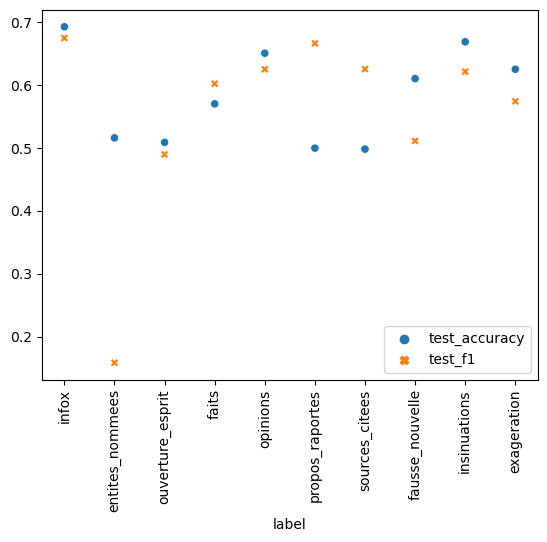

In [51]:
plot = sns.scatterplot(df_results[['test_accuracy','test_f1']])
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

/var/folders/fr/mhrqmk5n1xs49b7jl3tgs2r00000gn/T/ipykernel_7837/617114656.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)


[Text(0, 0, 'infox'),
 Text(1, 0, 'entites_nommees'),
 Text(2, 0, 'ouverture_esprit'),
 Text(3, 0, 'faits'),
 Text(4, 0, 'opinions'),
 Text(5, 0, 'propos_raportes'),
 Text(6, 0, 'sources_citees'),
 Text(7, 0, 'fausse_nouvelle'),
 Text(8, 0, 'insinuations'),
 Text(9, 0, 'exageration')]

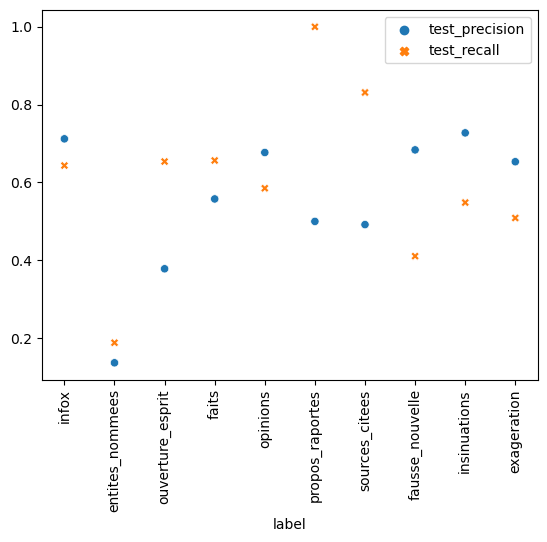

In [33]:
plot = sns.scatterplot(df_results[['test_precision','test_recall']])
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

# Sauvegarde des résultats
---

In [ ]:
## Sauvegarde des métriques

In [ ]:
df_results.to_csv('data/tmp/231023-ResultsLinguistic.csv')

In [ ]:
## Entrainement sur tout le dataset

In [ ]:
from sklearn.pipeline import make_pipeline

vectorizer = TfidfVectorizer()
classifier = LogisticRegression(C=100, random_state=_rs, solver='lbfgs', multi_class='ovr', max_iter=1000)
predictor_pipeline = make_pipeline(vectorizer, classifier)

def train_predictor(label,df_ml):
    X = df_ml['text']
    y = df_ml[label]
    predictor_pipeline.fit(X,y)
    return predictor_pipeline

predictors = {}
for label in labels:
    print(f'Processing {label}')
    df_ml = get_balanced_df_ml(label,df_label)
    predictors[label]=train_predictor(label,df_ml)

import pickle

with open('data/tmp/231023-PredictorsBow.pkl','wb') as file:
    pickle.dump(predictors,file)

# Conclusions
---

# Bricolages
---